# Анализ ошибок выичслений по построенным схемам

In [1]:
#-ПОДКЛЮЧЕНИЕ-МОДУЛЕЙ-И-БИБЛИОТЕК-
%matplotlib notebook

import numpy              as np
import scipy
import matplotlib.pyplot  as plt
import glob
import moviepy.editor     as mpy
import nbimporter
import CyclicScheme1TransportEquation as schemes

from scipy                import sparse
from scipy.sparse         import linalg
from numpy                import pi, sin, cos, ma
from pylab                import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib           import cm
from matplotlib.ticker    import LinearLocator, FormatStrFormatter
from matplotlib           import animation
from numpy.linalg import norm

## 0. Функции анализа ошибок

In [2]:
#-ФУНКЦИИ-ВЫЧИСЛЕНИЯ-ОШИБОК-РАССЧЕТА-ПРИ-СГУЩЕНИИ-СЕТОК
# NormError - считает норму ошибки
#  * scheme_name - тестируемая схема
#  * scheme_name - тестируемая схема
#  * num - число сгущений сетки
#  * base - во сколько раз сгущаем сетку
#  * x_max - отрезок, на котором ищется решение
#  * t_max - отрезок времени (равен периоду начального условие)

def NormError(norm_name, scheme_name, num, base, x_max, t_max):
    error = np.zeros(num)
    
    for i in range(0,num):
    
        count_x = 10*(2**i)
        count_t = 100*(2**i)
        h       = x_max/count_x
        if('SBP' in scheme_name):
            SC      = sin(np.arange(0, count_x+1, dtype=double)*h)
        else:
            SC      = sin(np.arange(0, count_x, dtype=double)*h)
        
        [x,t,PHI] = schemes.CyclicScheme1TransportEquation(scheme_name, x_max, t_max, count_x, count_t, 1, SC)
        
        if (norm_name == 'uniform'):
            error_vect       = abs(PHI[-1] - SC)
            error[i]     = max(error_vect)
            
        elif (norm_name == 'l2'):
            error_vect   = PHI[-1] - SC
            error[i]     = h*np.linalg.norm(error_vect)**2
    
    return error

In [3]:
#-СРАВНЕНИЕ-РЕЗУЛЬТАТОВ-РАСЧЕТА-ПО-РАЗНЫМ-СХЕМАМ-

def CompareSchemes(first_scheme, second_scheme, x_max, t_max, count_x, count_t):
    
    h   = x_max/count_x
    tau = t_max/count_t
    
    if ('SBP' in first_scheme):
        SC1 = sin(np.arange(0, count_x+1, dtype=double)*h)
    else:
        SC1 = sin(np.arange(0, count_x, dtype=double)*h)
    
    if ('SBP' in second_scheme):
        SC2 = sin(np.arange(0, count_x+1, dtype=double)*h)
    else:
        SC2 = sin(np.arange(0, count_x, dtype=double)*h)
        
    [x1,t1,PHI1] = schemes.CyclicScheme1TransportEquation(first_scheme,  x_max, t_max, count_x, count_t, 1, SC1)
    [x2,t2,PHI2] = schemes.CyclicScheme1TransportEquation(second_scheme, x_max, t_max, count_x, count_t, 1, SC2)
    
    if   (('SBP' in first_scheme) & ('SBP' not in second_scheme)):
        Error = PHI1[:,0:-1] - PHI2
    elif (('SBP' not in first_scheme) & ('SBP' in second_scheme)):
        Error = PHI1 - PHI2[:,0:-1]
    else: Error = PHI1 - PHI2
        
    return Error

## 1. Сгущение сеток

In [23]:
#-ВЫЧИСЛЕНИЕ-РАВНОМЕРНЫХ-НОРМ-ОШИБОК-
num   = 4
x_max = 2*pi
t_max = 2*pi

Error = np.zeros((2,4,num))

Error[0,0] = NormError('uniform',  'euler+left', num, 2, x_max, t_max)
Error[0,1] = NormError('uniform',    'RK4+left', num, 2, x_max, t_max)
Error[0,2] = NormError('uniform', 'RK4+center2', num, 2, x_max, t_max)
Error[0,3] = NormError('uniform', 'RK4+center4', num, 2, x_max, t_max)

Error[1,0] = NormError('l2',  'euler+left', num, 2, x_max, t_max)
Error[1,1] = NormError('l2',    'RK4+left', num, 2, x_max, t_max)
Error[1,2] = NormError('l2', 'RK4+center2', num, 2, x_max, t_max)
Error[1,3] = NormError('l2', 'RK4+center4', num, 2, x_max, t_max)

print('Равномерные нормы для четырех схем')
print(Error[0,0])
print(Error[0,1])
print(Error[0,2])
print(Error[0,3])

print('l2 нормы для четырех схем')
print(Error[1,0])
print(Error[1,1])
print(Error[1,2])
print(Error[1,3])

Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Равномерные нормы для четырех схем
[0.80871305 0.58838209 0.35846059 0.19910417]
[0.83966024 0.62624979 0.3890862  0.21857348]
[0.39432513 0.10266426 0.02580384 0.0064576 ]
[3.11385632e-02 2.01634769e-03 1.27137387e-04 7.96361176e-06]
l2 нормы для четырех схем
[2.19196407 1.0905596  0.40412349 0.12458408]
[2.35533244 1.23677213 0.47638085 0.15016759]
[5.0912

In [16]:
#-ВЫЧИСЛЕНИЕ-РАВНОМЕРНЫХ-НОРМ-ОШИБОК-
num   = 4
x_max = 2*pi
t_max = 2*pi

Error = np.zeros((2,4,num))

Error[0,0] = NormError('l2',  'RK4+SBP-4,2', num, 2, x_max, t_max)

Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1
Число Куранта: 
0.1


In [18]:
Error[0,0]

array([3.84276022e-02, 7.60580411e-04, 1.00874496e-05, 1.42603673e-07])

-----
## 2. Сравнение схем

###  Center2 VS SBP-2,1
###  Center4 VS SBP-4,2

In [4]:
#-СРАВНЕНИЕ-СХЕМ-
Error1 = CompareSchemes('RK4+center2', 'RK4+SBP-2,1', 2*pi, 2*pi, 200, 400)
Error2 = CompareSchemes('RK4+center4', 'RK4+SBP-4,2', 2*pi, 2*pi, 200, 400)

Число Куранта: 
0.5
Число Куранта: 
0.5
Число Куранта: 
0.5
Число Куранта: 
0.5


In [5]:
#-МАКСИМАЛЬНЫЕ-ОТКЛОНЕНИЯ-
MaxE1 = max(abs(Error1[-1]))
MaxE2 = max(abs(Error2[-1]))

print("Center2 vs SBP-2,1: " + str(MaxE1))
print("Center4 vs SBP-4,2: " + str(MaxE2))

Center2 vs SBP-2,1: 0.008576440716983935
Center4 vs SBP-4,2: 52773562490.183334


<IPython.core.display.Javascript object>


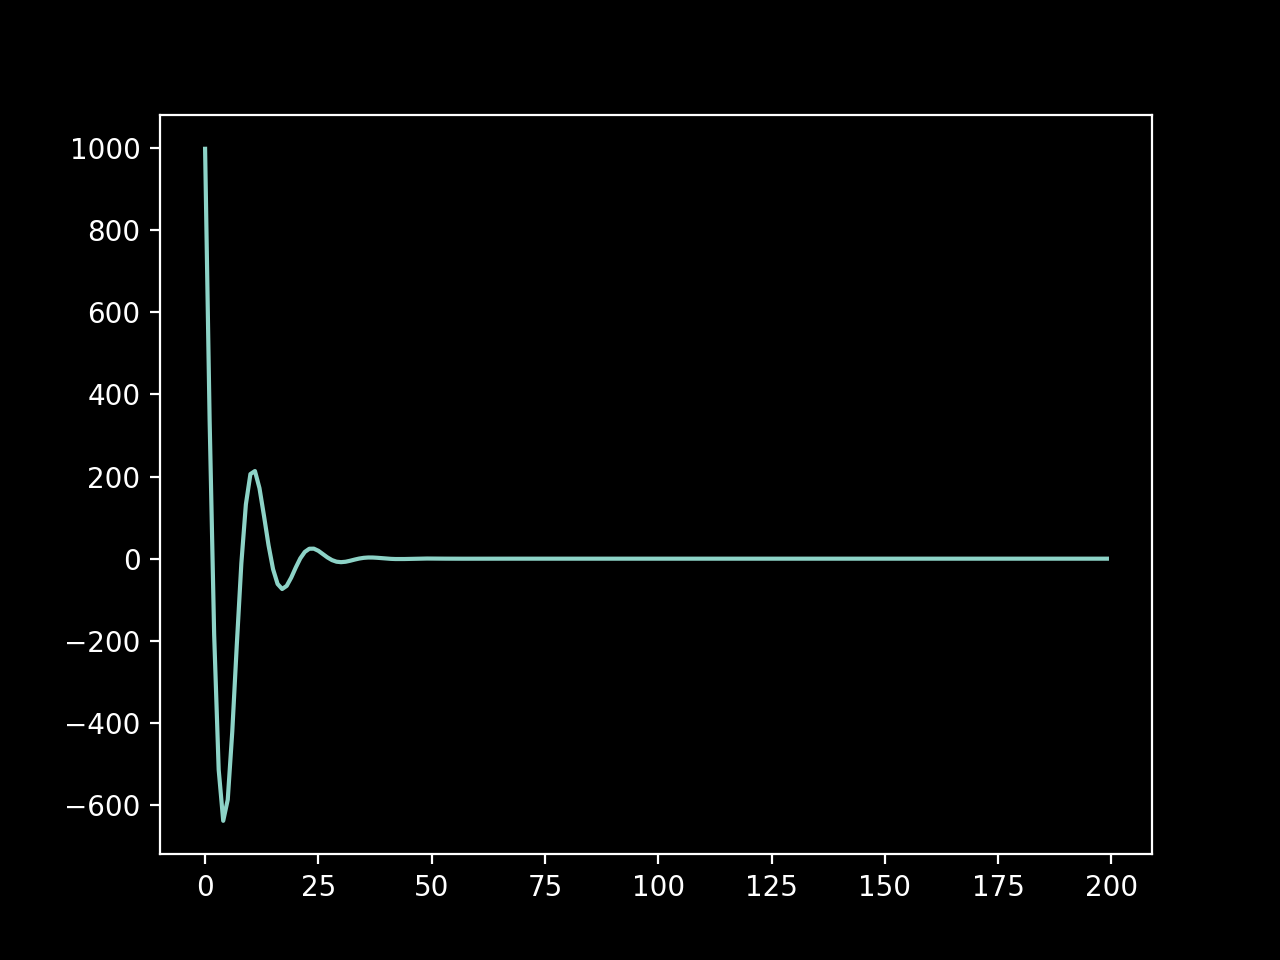

In [8]:
#-ВИЗУАЛИЗАЦИЯ-ОШИБКИ-ВО-ВТОРОМ-СЛУЧАЕ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(Error2[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    surf = ax.plot(Error2[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=400, interval=1, repeat = False)

###  SBP-2,1 VS SBP-2,1-SAT
###  SBP-4,2 VS SBP-4,2-SAT

In [4]:
#-СРАВНЕНИЕ-СХЕМ-
Error1 = CompareSchemes('RK4+SBP-2,1+SAT', 'RK4+SBP-2,1', 2*pi, 2*pi, 200, 400)
Error2 = CompareSchemes('RK4+SBP-4,2+SAT', 'RK4+SBP-4,2', 2*pi, 2*pi, 200, 400)

Число Куранта: 
0.5
Число Куранта: 
0.5
Число Куранта: 
0.5
Число Куранта: 
0.5


In [5]:
#-МАКСИМАЛЬНЫЕ-ОТКЛОНЕНИЯ-
MaxE1 = max(abs(Error1[-1]))
MaxE2 = max(abs(Error2[-1]))

print("Center2 vs SBP-2,1: " + str(MaxE1))
print("Center4 vs SBP-4,2: " + str(MaxE2))

Center2 vs SBP-2,1: 0.017844648743577718
Center4 vs SBP-4,2: 6.601686424825536e+35


<IPython.core.display.Javascript object>


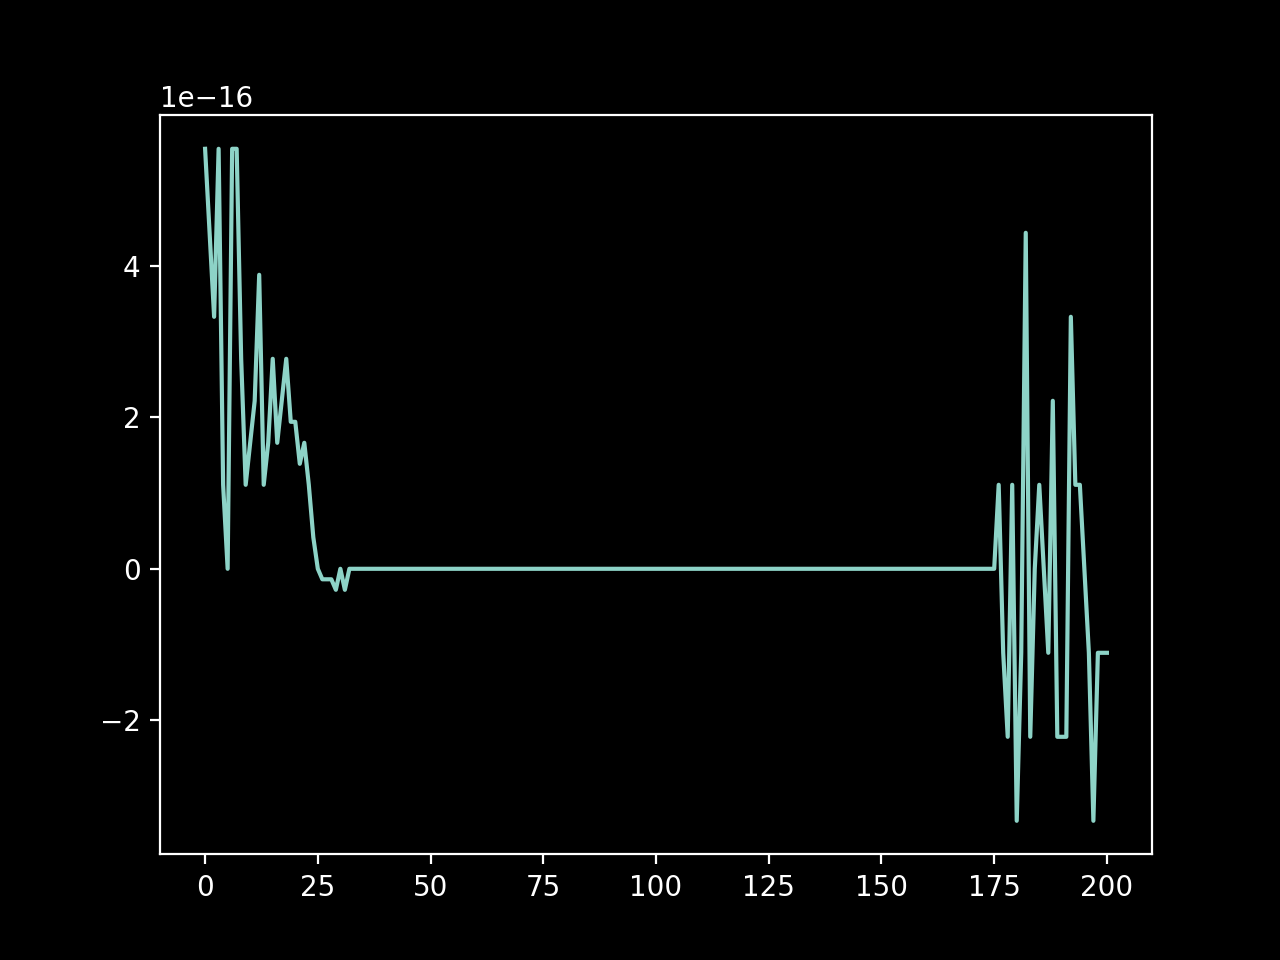

In [8]:
#-ВИЗУАЛИЗАЦИЯ-ОШИБКИ-ВО-ВТОРОМ-СЛУЧАЕ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(Error2[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    surf = ax.plot(Error2[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=400, interval=1, repeat = False)